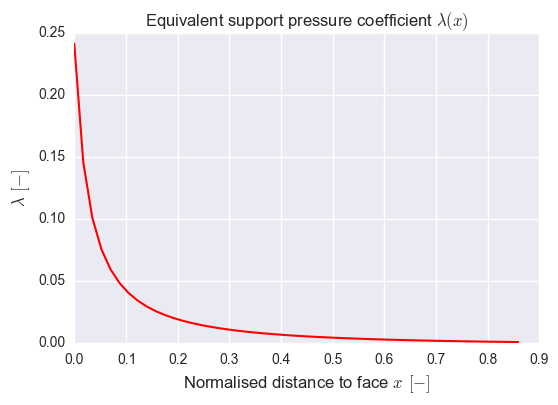

In [4]:
"""
author: onur koc

This code intends to calculate the pre-relaxation factor behind
the tunnel face as defined in the following publication:

[Radončić, Nedim; Pilgerstorfer, Thomas]
Prediction of spatial displacement development
Geomechanics and Tunnelling 2 (2009), No.3
"""

import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
from mpldatacursor import datacursor 
import seaborn
#%pylab
%matplotlib inline

# ------------
# Input values
# ------------
gamma = 25
# Specific weight of the rock mass [kN/m³]
H = 800
# Overburden [m]
nu = 0.1
# Poisson's ratio of the rock [-]
E = 2500000
# Modulus of elasticity of the rock [kPa]
p_o = gamma * H
# In-situ stress [kPa]
D = 12
# Diameter of the tunnel [m]
c = 1000
# Cohesion of the rock [kPa]
phi = 30
# Friction angle of the rock [deg]
Phi = np.deg2rad(phi)
# Convertion from degrees to radians [rad]

sigma_cm = 2 * c * np.cos(Phi) / (1 - np.sin(Phi))
# Uniaxial strength of the rock mass [kPa]

k = (1 + np.sin(Phi)) / (1 - np.sin(Phi))
# Slope defined by the Mohr-Coulomb criterion [-]

# ----------------------------
# Analysis of tunnel behaviour
# ----------------------------

p_cr = (2 * p_o - sigma_cm) / (1 + k)
# Critical support pressure [kPa]
# Note: if the critical support pressure is smaller than the internal
# support pressure then failure does not occur

r_o = D / 2
# Radius of the tunnel [m]

r_p = 15
#r_p = r_o * (2 * (p_o * (k-1) + sigma_cm) / (1+k) / ((k-1) * p_cr+sigma_cm))**(1/(k-1))
# Radius of the plastic zone [m]

# ------------------------
# Variables of Lambda Face
# ------------------------

a = 0.1314 * np.tan(Phi) + 0.0129
b = -0.0259 * np.tan(Phi) + 2.6227
c = 0.011 * np.tan(Phi) - 0.6439
d = -0.1854 * np.tan(Phi) - 0.1593
e = -0.1396 * np.tan(Phi) + 0.8092

variables_1 = [['a', a], 
               ['b', b], 
               ['c', c], 
               ['d', d], 
               ['e', e]
               ]

# ----------------------------
# Variables of Shape Parameter
# ----------------------------

a_ = 0.023625
b_ = 0.4604 * np.tan(Phi)**2 + 0.3749 * np.tan(Phi) + 5.5276
c_ = -0.0397 * np.tan(Phi)**2 + 0.015 * np.tan(Phi) - 1.0327
d_ = 0.047395
e_ = -0.0247 * np.tan(Phi)**2 - 0.006 * np.tan(Phi) + 0.0039

variables_2 = [['a_', a_],
               ['b_', b_],
               ['c_', c_],
               ['d_', d_],
               ['e_', e_]
               ]

v_1 = pd.DataFrame(variables_1)
v_2 = pd.DataFrame(variables_2)
# Convert variables into pandas dataframes
#v_1 = [float(Decimal("%.5f" % e)) for e in variables_1]

eta = (r_p - r_o) / r_o
# Associated relative depth of failure

L_infl = (2.07 * eta + 6.40) * r_o
# Influenced length

lambda_face = a * np.cos(b * eta + c) + d * eta + e
# Pre-relaxation factor

ksi = a_ * np.cos(b_ * np.sqrt(eta) - eta + c_) + d_ + e_ * eta
# Shape parameter

x = np.arange(0, 50, 1)
# Distance to face

x_ = x / L_infl
# Normalized distance to face

lambda_x_radoncic = lambda_face * ksi**1.2 * ((1 - x_) / (x_ + ksi))**1.2
# Equivalent support pressure coefficient at relative distance to face x_

lambda_x_panet = 0.25 + 0.75 *(1 - (0.75 / (0.75 + x / r_o)**2))
# Equivalent support pressure coefficient according to panet

lambda_x_hoek = 1 + np.exp(-x / (1.10 * r_o))**(-1.7)



#print(v_1)
#print(v_2)
#print(p_cr)
#print(r_p)
#print(eta)
#print(lambda_face)
#print(ksi)

plt.figure(num=1, dpi=125, edgecolor='w')
fig = plt.gcf()
fig.canvas.set_window_title('Equivalent support pressure coefficient')
plt.plot(x_, lambda_x_radoncic, 'r-', lw=1.5, label='Radoncic et. al.')
#plt.plot(x, lambda_x_hoek, 'b-', lw=1.5, label='Hoek')
plt.title('Equivalent support pressure coefficient $\lambda(x)$')
plt.ylabel('$\lambda\,[-]$', fontsize=12)
plt.xlabel('Normalised distance to face $x\,[-]$', fontsize=12)
datacursor(display='multiple', draggable=True)
plt.show()